<a href="https://colab.research.google.com/github/edojatheophilus/Trainings/blob/main/Data_Analysis_using_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')


In [ ]:
#Check duplicate values
df.duplicated().sum()

0

In [ ]:
# descriptive analysis
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
df.head

<bound method NDFrame.head of      day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

<ipython-input-81-d9c6add89760>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


<Axes: >

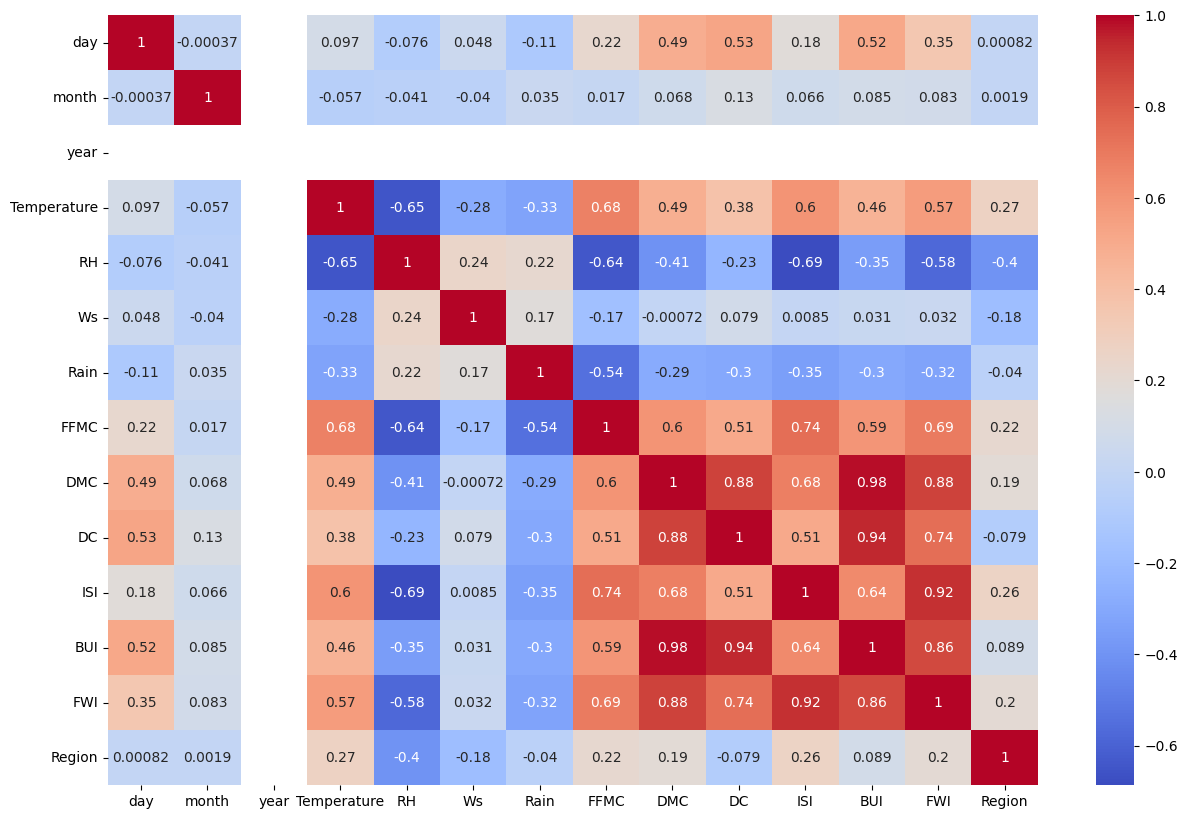

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

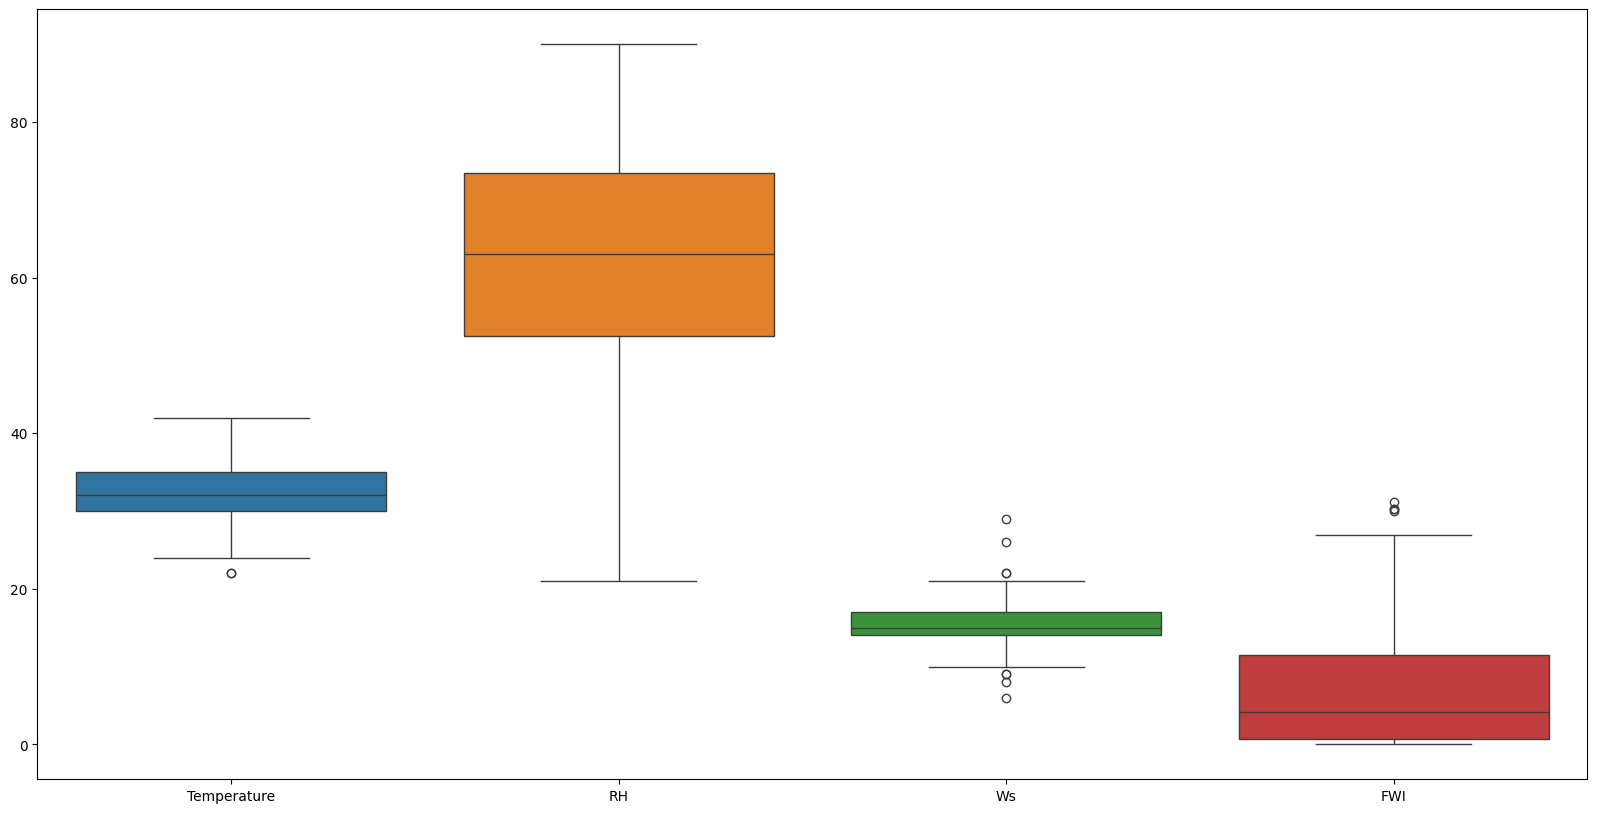

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df.drop(columns=['day','month', 'year', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Region']))
plt.show()

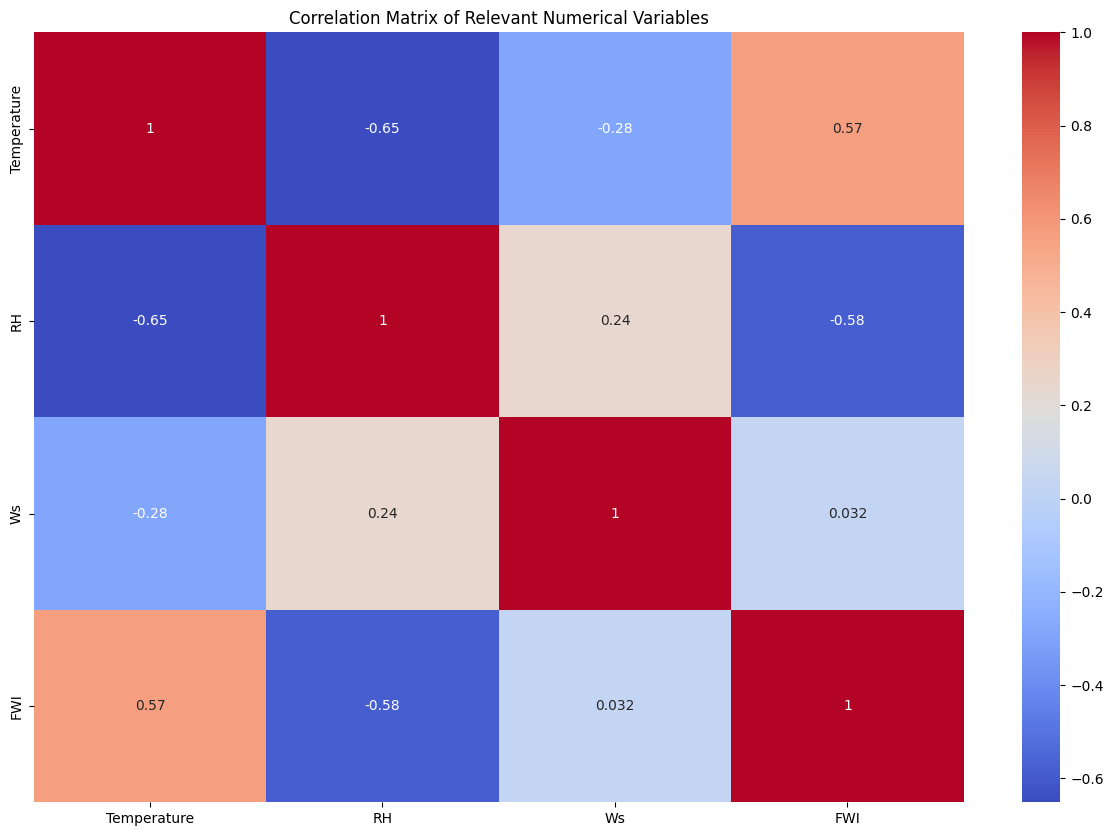

In [ ]:
relevant_cols = ['Temperature', 'RH', 'Ws', 'FWI']
df_relevant = df[relevant_cols]

# Calculate the correlation matrix
correlation_matrix = df_relevant.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Relevant Numerical Variables')
plt.show()

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
# storing 5 records for later evaluation
unseen_records = df.sample(5, random_state=10)

# Removing the unseen records from the dataset
df = df.drop(unseen_records.index)

# Define features (X) and target variable (y)
x = df[['RH', 'Ws', 'Temperature']]  # Features
y = df['FWI']  # Target variable

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=18)

In [ ]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [ ]:
x.head()

,RH,Ws,Temperature
0,57,18,29
1,61,13,29
2,82,22,26
3,89,13,25
4,77,16,27


In [ ]:
# Scaling using standardisation
scaler = StandardScaler()

In [ ]:
#Fit scaler to training data and transform training and test data
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [ ]:
lr = LinearRegression()
lr.fit(x_train_sc,y_train)

LinearRegression()

In [ ]:
print("Shape of x_train_scaled:", x_train_sc.shape)
print("Shape of x_test_scaled:", x_test_sc.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train_scaled: (190, 3)
Shape of x_test_scaled: (48, 3)
Shape of y_train: (190,)
Shape of y_test: (48,)


In [ ]:
lr.coef_, lr.intercept_

(array([-2.66731587,  1.76073108,  2.80634557]), 6.853684210526314)

In [ ]:
y_pred = lr.predict(x_test_sc)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('r2:', r2)
print('mae:', mae)
print('mse:', mse)

r2: 0.4653936002728336
mae: 4.9641769750925855
mse: 38.8491022389444


In [ ]:
RR=Ridge()
RR.fit(x_train_sc,y_train)

Ridge()

In [ ]:
y_pred=RR.predict(x_test_sc)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('r2 for ridge:', r2)
print('mae for ridge:', mae)
print('mse for ridge:', mse)

r2 for ridge: 0.46491018599963463
mae for ridge: 4.96555563401743
mse for ridge: 38.884231280670896


In [ ]:
Lasso_Reg=Lasso(alpha=0.01)

In [ ]:
Lasso_Reg.fit(x_train_sc,y_train)

Lasso(alpha=0.01)

In [ ]:
lasso_y_pred=Lasso_Reg.predict(x_test_sc)
mse=mean_squared_error(y_test,lasso_y_pred)
r2=r2_score(y_test,lasso_y_pred)
mae=mean_absolute_error(y_test,lasso_y_pred)
print('r2 for LR:', r2)
print('mae for LR:', mae)
print('mse for LR:', mse)

r2 for LR: 0.4650385549003039
mae for LR: 4.964659011354043
mse for LR: 38.87490289150656


In [ ]:
ENR=ElasticNet()
ENR.fit(x_train_sc,y_train)
ENR_y_pred=ENR.predict(x_test_sc)
mse=mean_squared_error(y_test,ENR_y_pred)
r2=r2_score(y_test,ENR_y_pred)
mae=mean_absolute_error(y_test,ENR_y_pred)
print('r2 for ENR:', r2)
print('mae for ENR:', mae)
print('mse for ENR:', mse)

r2 for ENR: 0.35629649522567197
mae for ENR: 5.550166581044571
mse for ENR: 46.77703686545288


In [ ]:
# Define parameter distributions for each model
ridge_param_dist = {'alpha': uniform(loc=0, scale=1)}
lasso_param_dist = {'alpha': uniform(loc=0, scale=1)}
elasticnet_param_dist = {'alpha': uniform(loc=0, scale=1), 'l1_ratio': uniform(loc=0, scale=1)}

ridge_model = Ridge()
lasso_model = Lasso()
elasticnet_model = ElasticNet()

# Setting RandomizedSearchCV for each model
ridge_random = RandomizedSearchCV(estimator=ridge_model, param_distributions=ridge_param_dist, n_iter=100, cv=5, random_state=42)
lasso_random = RandomizedSearchCV(estimator=lasso_model, param_distributions=lasso_param_dist, n_iter=100, cv=5, random_state=42)
elasticnet_random = RandomizedSearchCV(estimator=elasticnet_model, param_distributions=elasticnet_param_dist, n_iter=100, cv=5, random_state=42)

# Fitting RandomizedSearchCV for each model
ridge_random.fit(x_train_sc, y_train)
lasso_random.fit(x_train_sc, y_train)
elasticnet_random.fit(x_train_sc, y_train)

#predicting
ridge_y_pred = ridge_random.predict(x_test_sc)
lasso_y_pred = lasso_random.predict(x_test_sc)
elasticnet_y_pred = elasticnet_random.predict(x_test_sc)

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
print('Ridge Regression:')
print('r2:', ridge_r2)
print('mae:', ridge_mae)
print('mse:', ridge_mse)

# Evaluate Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
print('\nLasso Regression:')
print('r2:', lasso_r2)
print('mae:', lasso_mae)
print('mse:', lasso_mse)

# Evaluate ElasticNet Regression
elasticnet_mse = mean_squared_error(y_test, elasticnet_y_pred)
elasticnet_r2 = r2_score(y_test, elasticnet_y_pred)
elasticnet_mae = mean_absolute_error(y_test, elasticnet_y_pred)
print('\nElasticNet Regression:')
print('r2:', elasticnet_r2)
print('mae:', elasticnet_mae)
print('mse:', elasticnet_mse)


Ridge Regression:
r2: 0.4649166069279811
mae: 4.965528398860694
mse: 38.883764680753785

Lasso Regression:
r2: 0.4614292832499385
mae: 4.97531208316267
mse: 39.137183633796084

ElasticNet Regression:
r2: 0.45710255322042137
mae: 4.993624927791498
mse: 39.45160107691461


**Explain the purpose and benefits of pickling a model.**

**Portability**: Pickled files can be easily transferred between different Python environments and platforms. This makes it convenient to share trained models, datasets, or other objects with collaborators or deploy them to production environments.

**Security**: Pickling allows you to serialize and save Python objects in a binary format, which can be encrypted or password-protected for security purposes. This helps protect sensitive data or proprietary models from unauthorized access or tampering.

**Efficiency**: Pickling can significantly reduce the time and resources required to reload large or complex objects into memory compared to recreating them from scratch. This can be particularly useful when working with large datasets or trained machine learning models that have many parameters.


In [ ]:
with open('elasticnet_model.pkl', 'wb') as file:
    pickle.dump(elasticnet_random, file)

In [ ]:
import pickle
pickle.dump(elasticnet_random, open('elasticnet_model.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))

In [ ]:
def preprocess_data(df):

  # List of columns to keep
  columns_to_keep = ['Ws', 'RH', 'Temperature', 'FWI']

  # Drop all columns except the specified columns
  df = df[df.columns.intersection(columns_to_keep)]

  # Separate independent and dependent variables
  x = df.drop(columns=['FWI'])
  y = df['FWI']

  with open('scaler.pkl', 'rb') as file:
      scaler = pickle.load(file)

  x_scaled = scaler.transform(x)
  return x_scaled, y

In [ ]:
# Loading the pickle model
pickle_file = '/content/elasticnet_model.pkl'
with open(pickle_file, 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
unseen_records.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
46,17,7,2012,29,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,fire,0
225,13,9,2012,29,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,fire,1
180,30,7,2012,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,fire,1
116,25,9,2012,26,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1,not fire,0
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [ ]:
desired_order = ['RH', 'Ws', 'Temperature', 'FWI']
unseen_records_ordered = unseen_records.reindex(columns=desired_order)

In [ ]:
x_scaled, y = preprocess_data(unseen_records_ordered)
x_scaled[:5]

array([[ 0.52752486, -0.53251583, -0.87174686],
       [-0.8975423 ,  1.2240468 , -0.87174686],
       [-0.42251991,  0.17010922,  1.06062534],
       [ 1.27398862,  1.92667186, -1.69990637],
       [ 1.20612827, -0.53251583, -0.87174686]])

In [ ]:
prediction = loaded_model.predict(x_scaled)
prediction

array([ 2.41866622,  8.72906303, 10.95978052,  2.13901127,  0.69879379])

In [ ]:
print("pickled Model evaluation metrics: ")
MSE = mean_squared_error(y, prediction)
MAE = mean_absolute_error(y, prediction)
R2 = r2_score(y, prediction)
print('MAE of pickled Model: ', MAE)
print('MSE of pickled Model: ',MSE)
print('R2 of pickled Model: ', R2)

pickled Model evaluation metrics: 
MAE of pickled Model:  1.5260590569032508
MSE of pickled Model:  2.6796193448324765
R2 of pickled Model:  0.9071202012855115


The model demonstrates strong performance in predicting the target variable based on the provided features. The R-squared (R2) score of approximately 0.907 suggests that the model explains around 90.7% of the variance in the target variable. This indicates a high level of accuracy. In conclusion, the evaluation metrics suggest that the pickled model performs well in predicting the target variable and can be effectively utilized for making accurate predictions in real-world scenarios.

All three models (Ridge Regression, Lasso Regression, ElasticNet Regression) achieve reasonable R-squared (R2) scores, indicating that they explain a significant portion of the variance in the target variable. This suggests that the models capture some of the underlying patterns in the data.
The MAE values for all models are relatively low, indicating that, on average, the models' predictions are close to the actual values. This suggests that the models provide reasonable accuracy in predicting the target variable.

Recommendation: Exploring additional features or transformations of existing features that may better capture the underlying relationships in the data.

